In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from skimage.measure import block_reduce

rc('text', usetex=True)
rcParams["font.family"] = "Times New Roman"
rcParams["font.size"] = 9
rc('legend', fontsize=7)
mm = 0.1/2.54

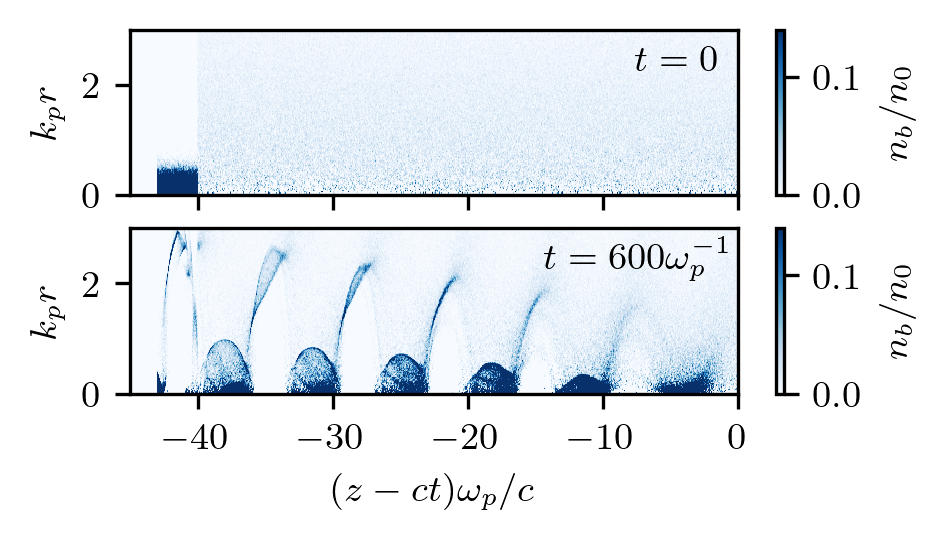

In [5]:
# Plot beam density

def plot_density_map(time=600):
    data = np.load(f'./diagnostics/slice_{time:05d}.00.npz')
    nb = -(data['rho_beam'].T)
    xi_grid = data['xi']
    x_grid = data['x']
    plt.pcolormesh(xi_grid, x_grid, nb, cmap='Blues', vmin=0, vmax=0.14, 
                   rasterized=True)
    plt.colorbar(label=r'$n_b / n_0$', orientation="vertical")
    plt.ylim(0,3)
    # plt.xlim(0,60)
    plt.ylabel(r'$k_p r$')

fig = plt.figure(figsize=(83*mm, 40*mm), dpi=300)

plt.subplot(211)
plot_density_map(5)
ax=plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.text(0.83, 0.75, r'$t=0$', transform=ax.transAxes, c='k')

plt.subplot(212)
plot_density_map(600)
plt.xlabel(r'$(z-ct)\omega_p/c$')
ax=plt.gca()
plt.text(0.68, 0.75, r'$t= 600 \omega_p^{-1}$', transform=ax.transAxes, c='k')

plt.savefig('nb.png',format='png', dpi=300, bbox_inches='tight')

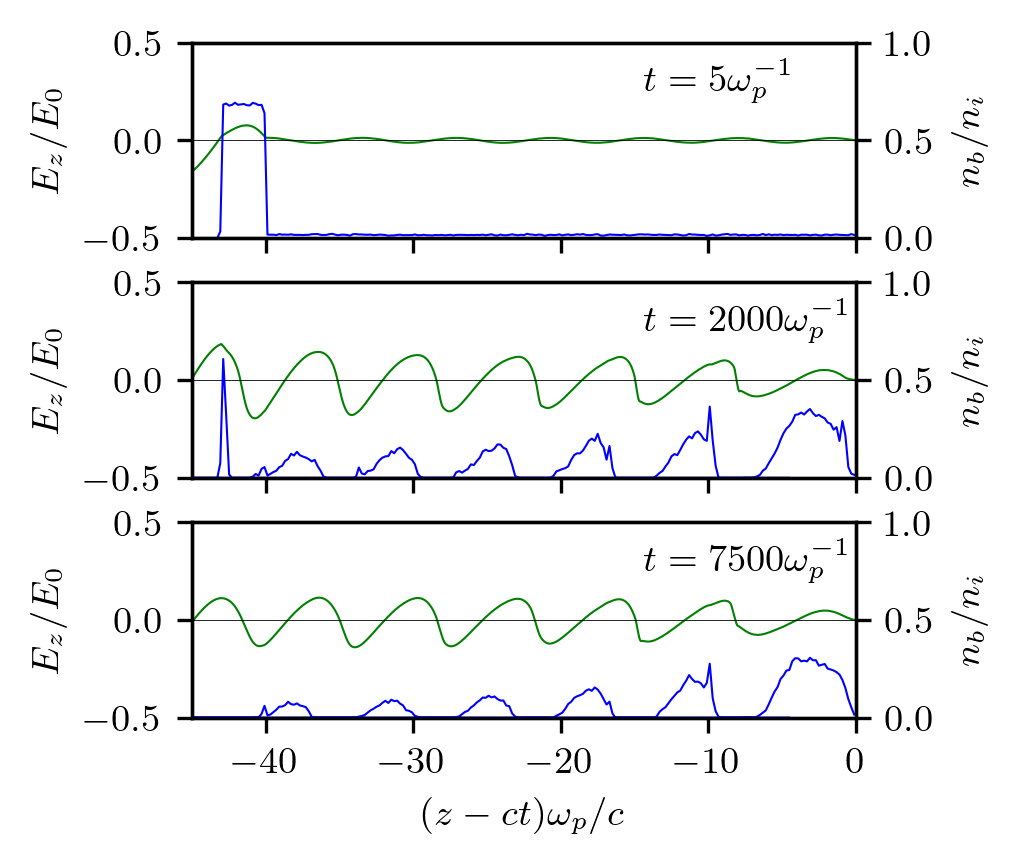

In [7]:
# Plot on axis acceleration field and beam density

def plot_subfigure(time=2000):
    data = np.load(f'./diagnostics/f_xi_{time:05d}.00.npz')
    ax = plt.gca()
    plt.plot(data['xi'], data['E_z'], lw=0.5, color='g', label=r"$E_z$")
    
    data = np.load(f'./diagnostics/slice_{time:05d}.00.npz')
    nb = -(data['rho_beam'].T)
    x_grid = data['x'] + 0.01
    nb_aver = np.average(nb[0:20, :], weights = x_grid[0:20], axis=0)
    nb_aver = block_reduce(nb_aver, block_size=10, func=np.mean)
    xi_grid = block_reduce(data['xi'], block_size=10, func=np.mean)
    plt.axhline(y=0, lw = 0.2, color = 'k')
    plt.ylabel(r'$E_z/E_0$')
    plt.ylim(-0.5,0.5)
    plt.text(0.68, 0.75, f'$t={time}$' + r'$\omega_p^{-1}$', 
             transform=ax.transAxes, c='k')

    ax2 = ax.twinx()
    plt.plot(xi_grid, nb_aver, lw=0.5, color='b', label=r"$n_b$")
    plt.ylabel(r'$n_b/n_i$')
    plt.ylim(0,1)
    plt.xlim(-45, 0)

    return ax

fig = plt.figure(figsize=(83*mm, 70*mm), dpi=300)

plt.subplot(311)
ax = plot_subfigure(5)
ax.axes.xaxis.set_ticklabels([])

plt.subplot(312)
ax = plot_subfigure(2000)
ax.axes.xaxis.set_ticklabels([])

plt.subplot(313)
ax = plot_subfigure(7500)
ax.set_xlabel(r'$(z-ct)\omega_p/c$')

plt.tight_layout(pad=0.3)
plt.savefig('Ez.png', format='png', dpi=300, bbox_inches='tight')